In [38]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

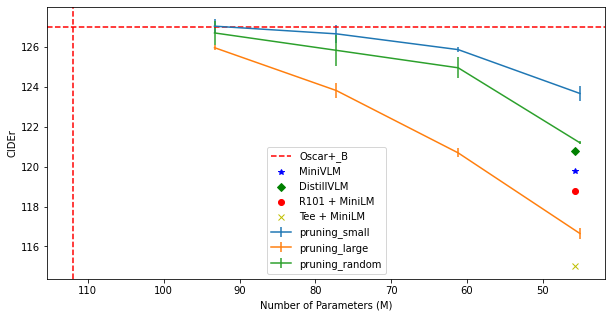

In [37]:
plt.figure(figsize=(10, 5))
output_dir = 'data/experiments/captioning/pruning_{}_{}/{}'
n_repeat = 3
metric = 'CIDEr'
for pruning_strategy in ['small', 'large', 'random']:
    params = []
    res = []
    for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
        for seed in range(n_repeat):
            resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, seed)
            data = json.load(open(resolved_output_dir + '/saved_info.json'))
            params.append(data['params'])
            res.append(data['test_result'][metric])
    params = np.array(params).reshape((-1, n_repeat))
    res = np.array(res).reshape((-1, n_repeat)) * 100
    params = params.mean(1)
    label = 'pruning_' + pruning_strategy
    plt.errorbar(params, res.mean(1), res.std(1), label = label)

plt.axhline(y=127, color='r', linestyle="dashed", label='Oscar+_B')
# plt.axhline(y=123.7, color='r', linestyle="dashed", label='Oscar_B')
plt.axvline(x=112, color='r', linestyle="dashed")
plt.plot(45.7,119.8,'b*', label='MiniVLM')
plt.plot(45.7,120.8,'gD', label='DistillVLM')
plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()

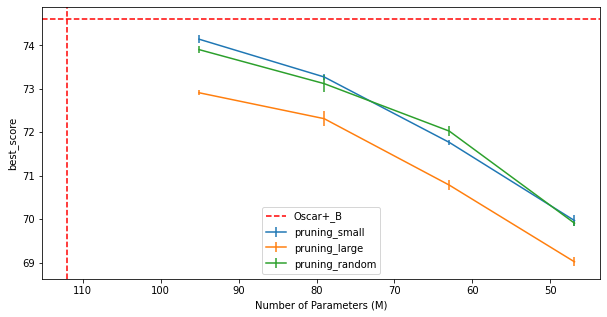

In [45]:
plt.figure(figsize=(10, 5))
output_dir = 'data/experiments/vqa/pruning_checkpoint-0-1000/pruning_{}_{}/{}'
n_repeat = 3
metric = 'best_score'
for pruning_strategy in ['small', 'large', 'random']:
    params = []
    res = []
    for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
        for seed in range(n_repeat):
            resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, seed)
            data = json.load(open(resolved_output_dir + '/saved_info.json'))
            params.append(data['params'])
            res.append(data[metric])
    params = np.array(params).reshape((-1, n_repeat))
    res = np.array(res).reshape((-1, n_repeat))
    params = params.mean(1)
    label = 'pruning_' + pruning_strategy
    plt.errorbar(params, res.mean(1), res.std(1), label = label)

plt.axhline(y=74.6, color='r', linestyle="dashed", label='Oscar+_B')
# # plt.axhline(y=123.7, color='r', linestyle="dashed", label='Oscar_B')
plt.axvline(x=112, color='r', linestyle="dashed")
# plt.plot(45.7,119.8,'b*', label='MiniVLM')
# plt.plot(45.7,120.8,'gD', label='DistillVLM')
# plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
# plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()